In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd drive

/content/drive


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
cd Redes\ neuronales

/content/drive/MyDrive/Redes neuronales


In [2]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 26B2-285B

 Directorio de c:\Users\juan-\Videos\python\pokemon\tasks\static

27/05/2024  04:34 p.�m.    <DIR>          .
27/05/2024  04:34 p.�m.    <DIR>          ..
27/05/2024  04:32 p.�m.    <DIR>          images
27/05/2024  04:33 p.�m.    <DIR>          images2
25/05/2024  09:52 p.�m.       233.976.471 model_pokemon.keras
27/05/2024  04:33 p.�m.    <DIR>          numpy
27/05/2024  04:32 p.�m.    <DIR>          prueba
26/05/2024  01:17 p.�m.           213.561 Untitled0.ipynb
               2 archivos    234.190.032 bytes
               6 dirs  782.998.220.800 bytes libres


In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Directorio que contiene las imágenes
directory = "images"
# Tamaño al que redimensionar las imágenes
target_size = (180, 180)

# Función para cargar y procesar las imágenes
def preprocess_images(directory, target_size):
    images = []
    labels = []

    class_names = {}  # Un diccionario para mapear nombres de clases a identificadores numéricos

    # Recorre todas las carpetas en el directorio
    for idx, label in enumerate(os.listdir(directory)):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            class_names[label] = idx  # Asigna un identificador numérico único a cada clase
            # Recorre todas las imágenes en la carpeta de la clase
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                # Carga la imagen y la redimensiona al tamaño deseado
                image = load_img(image_path, target_size=target_size)
                # Convierte la imagen a un array numpy
                image_array = img_to_array(image)
                # Normaliza los valores de los píxeles entre 0 y 1
                image_array /= 255.0
                # Añade la imagen y su etiqueta a las listas
                images.append(image_array)
                labels.append(label)

    # Convierte las listas de imágenes y etiquetas a arrays numpy
    images = np.array(images)
    labels = np.array(labels)

    # Convierte los nombres de las clases en identificadores numéricos
    labels_numeric = np.array([class_names[label] for label in labels])

    # Determina el número de clases dinámicamente
    unique_classes, counts = np.unique(labels_numeric, return_counts=True)
    num_classes = len(unique_classes)

    # Codifica las etiquetas en un formato one-hot
    labels_one_hot = to_categorical(labels_numeric, num_classes=num_classes)

    return images, labels_one_hot, class_names, labels_numeric

# Procesa las imágenes
images, labels_one_hot, class_names, labels_numeric = preprocess_images(directory, target_size)

# Crear una tabla de conversión de identificadores numéricos a nombres de clases
inverse_class_names = {v: k for k, v in class_names.items()}

# Imprime las formas de los arrays de imágenes y etiquetas
print("Forma de las imágenes:", images.shape)
print("Forma de las etiquetas one-hot:", labels_one_hot.shape)
#print("Nombres de las clases:", class_names)
#print("Tabla de conversión de etiquetas numéricas a nombres de clases:", inverse_class_names)

# Usar un conjunto para recolectar combinaciones únicas de los tres campos
unique_combinations = set()

# Recorrer todas las etiquetas para recolectar combinaciones únicas
for i in range(len(labels_one_hot)):  # Recorrer todas las etiquetas
    one_hot_label = labels_one_hot[i].astype(int)
    numeric_label = np.argmax(one_hot_label)  # Convertir one-hot a etiqueta numérica
    class_name = inverse_class_names[numeric_label]
    # Añadir la combinación única al conjunto
    unique_combinations.add((tuple(one_hot_label), numeric_label, class_name))

# Convertir el conjunto a una lista para facilitar el manejo y el ordenamiento
unique_combinations_list = list(unique_combinations)




Forma de las imágenes: (115, 180, 180, 3)
Forma de las etiquetas one-hot: (115, 40)


In [ ]:
# Imprimir las combinaciones únicas
for one_hot_label, numeric_label, class_name in unique_combinations_list:
    print(f"Etiqueta numérica: {numeric_label}, Nombre de la clase: {class_name}")

Etiqueta numérica: 24, Nombre de la clase: Ampharos
Etiqueta numérica: 25, Nombre de la clase: Amoonguss
Etiqueta numérica: 17, Nombre de la clase: Arceus
Etiqueta numérica: 29, Nombre de la clase: Alomomola
Etiqueta numérica: 36, Nombre de la clase: Accelgor
Etiqueta numérica: 2, Nombre de la clase: Azelf
Etiqueta numérica: 33, Nombre de la clase: Aggron
Etiqueta numérica: 34, Nombre de la clase: Aerodactyl
Etiqueta numérica: 30, Nombre de la clase: Alcremie
Etiqueta numérica: 16, Nombre de la clase: Archen
Etiqueta numérica: 19, Nombre de la clase: Arbok
Etiqueta numérica: 5, Nombre de la clase: Aurorus
Etiqueta numérica: 4, Nombre de la clase: Avalugg
Etiqueta numérica: 28, Nombre de la clase: Altaria
Etiqueta numérica: 23, Nombre de la clase: Anorith
Etiqueta numérica: 21, Nombre de la clase: Applin
Etiqueta numérica: 6, Nombre de la clase: Audino
Etiqueta numérica: 26, Nombre de la clase: Ambipom
Etiqueta numérica: 14, Nombre de la clase: Arctovish
Etiqueta numérica: 1, Nombre de 

In [ ]:
labels_numeric

array([ 0,  0,  1,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  7,  8,  9,  9, 10, 10, 11, 11, 12, 12, 12, 13,
       14, 15, 15, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19,
       19, 20, 20, 21, 22, 22, 23, 23, 24, 24, 24, 24, 24, 25, 25, 26, 26,
       27, 27, 28, 28, 28, 28, 29, 29, 30, 30, 31, 31, 31, 31, 31, 31, 32,
       32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 36,
       36, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39])

In [ ]:
np.save('images.npy', images)
np.save('labels.npy', labels_numeric)
#np.save('combinacion.npy', unique_combinations_list)
np.save('unique_combinations.npy', unique_combinations)

In [ ]:
#trainig data
imgs = np.load("images.npy")
labels = np.load("labels.npy")

In [ ]:
labels[10]

4

In [ ]:
from sklearn.model_selection import train_test_split

# Dividiendo el array en train y test
train_data, test_data = train_test_split(imgs, test_size=0.3, random_state=42)

print("Train data:", train_data.shape)
print("Test data:", test_data.shape)

# Dividiendo el array en train y test
train_labels, test_labels = train_test_split(labels, test_size=0.3, random_state=42)

print("Train labels:", train_labels.shape)
print("Test labels:", test_labels.shape)


Train data: (80, 180, 180, 3)
Test data: (35, 180, 180, 3)
Train labels: (80,)
Test labels: (35,)


In [ ]:
print("Test labels:", test_labels[0])

Test labels: 31


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=(180,180,3)),
    layers.Rescaling(1/255),
    layers.Conv2D(filters = 32 , kernel_size=(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64 , kernel_size=(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128 , kernel_size=(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 256 , kernel_size=(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 256 , kernel_size=(3,3), activation = "relu"),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_witch_augmentation.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics =["accuracy"])

In [ ]:
#import tensorflow as tf

# Crear el dataset de TensorFlow
dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))

# Barajar y crear lotes
batch_size = 1752
train_dataset = dataset.shuffle(buffer_size=1752).batch(batch_size)

# Imprimir la forma de los lotes de datos y etiquetas
for data_batch, labels_batch in train_dataset:
    print("Data Batch Shape:", data_batch.shape)
    print("Labels Batch Shape:", labels_batch.shape)
    break

# Crear el dataset de TensorFlow
val_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))

# Barajar y crear lotes
batch_size = 751
validation_dataset = val_dataset.shuffle(buffer_size=751).batch(batch_size)

# Imprimir la forma de los lotes de datos y etiquetas
for data_batch, labels_batch in validation_dataset:
    print("Data Batch Shape:", data_batch.shape)
    print("Labels Batch Shape:", labels_batch.shape)
    break

Data Batch Shape: (80, 180, 180, 3)
Labels Batch Shape: (80,)
Data Batch Shape: (35, 180, 180, 3)
Labels Batch Shape: (35,)


In [ ]:
history = model.fit(train_dataset, epochs=100, validation_data = validation_dataset, callbacks= callbacks)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.7009 - accuracy: 0.0125 - val_loss: -2.4748 - val_accuracy: 0.0286
Epoch 2/100
1/1 [==============================] - 0s 207ms/step - loss: -2.5801 - accuracy: 0.0250 - val_loss: -94.8569 - val_accuracy: 0.0286
Epoch 3/100
1/1 [==============================] - 0s 210ms/step - loss: -98.0842 - accuracy: 0.0250 - val_loss: -973.8730 - val_accuracy: 0.0286
Epoch 4/100
1/1 [==============================] - 0s 190ms/step - loss: -1006.9969 - accuracy: 0.0250 - val_loss: -5555.9829 - val_accuracy: 0.0286
Epoch 5/100
1/1 [==============================] - 0s 199ms/step - loss: -5745.2354 - accuracy: 0.0250 - val_loss: -21851.8770 - val_accuracy: 0.0286
Epoch 6/100
1/1 [==============================] - 0s 188ms/step - loss: -22593.4062 - accuracy: 0.0250 - val_loss: -66736.0859 - val_accuracy: 0.0286
Epoch 7/100
1/1 [==============================] - 0s 199ms/step - loss: -68993.7031 - accuracy: 0.0250 - val_loss: -1699

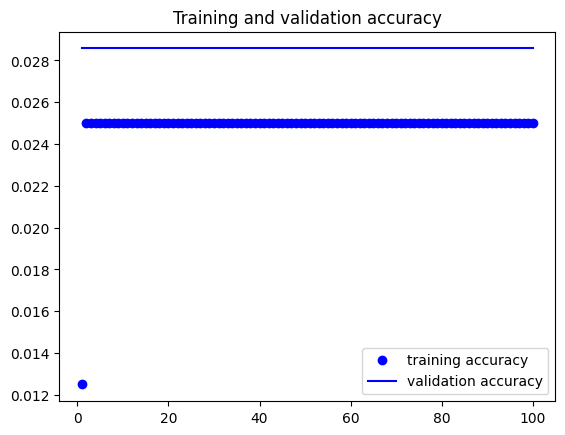

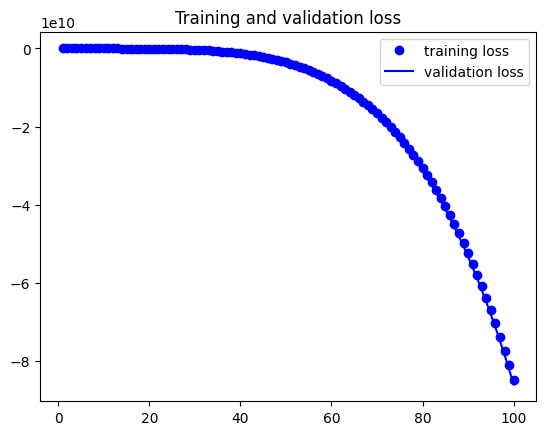

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="training accuracy")
plt.plot(epochs, val_accuracy, "b", label="validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
import os
import shutil
import random

def split_dataset(input_folder, output_train_folder, output_test_folder, split_ratio=0.8):
    # Obtener la lista de subcarpetas (nombres de Pokémon)
    subfolders = [f.path for f in os.scandir(input_folder) if f.is_dir()]

    # Crear carpetas de entrenamiento y prueba si no existen
    if not os.path.exists(output_train_folder):
        os.makedirs(output_train_folder)
    if not os.path.exists(output_test_folder):
        os.makedirs(output_test_folder)

    for subfolder in subfolders:
        # Nombre de la subcarpeta (nombre del Pokémon)
        folder_name = os.path.basename(subfolder)

        # Obtener la lista de imágenes en la subcarpeta
        images = [f.path for f in os.scandir(subfolder) if f.is_file() and f.name.endswith(('.jpg', '.jpeg', '.png'))]

        # Mezclar aleatoriamente las imágenes
        random.shuffle(images)

        # Calcular la cantidad de imágenes para el conjunto de entrenamiento y prueba
        num_train = int(len(images) * split_ratio)

        # Dividir las imágenes en conjunto de entrenamiento y prueba
        train_images = images[:num_train]
        test_images = images[num_train:]

        # Mover las imágenes al directorio de salida (entrenamiento)
        for image in train_images:
            shutil.copy(image, os.path.join(output_train_folder, folder_name))

        # Mover las imágenes al directorio de salida (prueba)
        for image in test_images:
            shutil.copy(image, os.path.join(output_test_folder, folder_name))

# Especifica las rutas de entrada y salida
input_folder = "images2"
output_train_folder = "images2/train"
output_test_folder = "images2/test"

# Llama a la función para dividir el conjunto de datos
split_dataset(input_folder, output_train_folder, output_test_folder, split_ratio=0.8)


In [ ]:
import os

def generate_tree(directory, prefix=''):
    # Imprime el nombre del directorio
    print(prefix + os.path.basename(directory) + '/')

    # Lista de elementos en el directorio
    items = os.listdir(directory)

    # Recorre cada elemento
    for item in sorted(items):
        # Obtiene la ruta completa del elemento
        item_path = os.path.join(directory, item)

        # Si es un directorio, llama recursivamente a la función para imprimir su contenido
        if os.path.isdir(item_path):
            if item != '__pycache__':
                generate_tree(item_path, prefix=prefix + '    |')
        # Si es un archivo, simplemente imprime su nombre
        else:
            print(prefix + '    |-', item)

# Ruta de la carpeta raíz
directory_path = "images2"

# Llama a la función para generar el árbol
generate_tree(directory_path)


images2/
    |Abomasnow/
    |    |- 0.jpg
    |    |- 1.jpg
    |    |- 2.jpg
    |    |- 3.jpg
    |Abra/
    |    |- 0.jpg
    |    |- 1.jpg
    |    |- 2.jpg
    |    |- 3.jpg
    |Absol/
    |    |- 0.jpg
    |    |- 1.jpg
    |    |- 2.jpg
    |    |- 3.jpg
    |Accelgor/
    |    |- 0.jpg
    |    |- 1.jpg
    |Aegislash/
    |    |- 0.jpg
    |    |- 1.jpg
    |    |- 2.jpg
    |    |- 3.jpg
    |Aerodactyl/
    |    |- 0.jpg
    |    |- 1.jpg
    |    |- 2.jpg
    |    |- 3.jpg
    |    |- 4.jpg
    |    |- 5.jpg
    |Aggron/
    |    |- 0.jpg
    |    |- 1.jpg
    |    |- 2.jpg
    |    |- 3.jpg
    |Aipom/
    |    |- 0.jpg
    |    |- 1.jpg
    |    |- 2.jpg
    |Alakazam/
    |    |- 0.jpg
    |    |- 1.jpg
    |    |- 2.jpg
    |    |- 3.jpg
    |    |- 4.jpg
    |    |- 5.jpg
    |Alcremie/
    |    |- 0.jpg
    |    |- 1.jpg
    |Alomomola/
    |    |- 0.jpg
    |    |- 1.jpg
    |Altaria/
    |    |- 0.jpg
    |    |- 1.jpg
    |    |- 2.jpg
    |    |- 3.jpg
    |Amau

In [ ]:
for image_path in train_generator.filepaths:
    print(image_path)


images2/Abomasnow/0.jpg
images2/Abomasnow/1.jpg
images2/Abomasnow/2.jpg
images2/Abomasnow/3.jpg
images2/Abra/0.jpg
images2/Abra/1.jpg
images2/Abra/2.jpg
images2/Abra/3.jpg
images2/Absol/0.jpg
images2/Absol/1.jpg
images2/Absol/2.jpg
images2/Absol/3.jpg
images2/Accelgor/0.jpg
images2/Accelgor/1.jpg
images2/Aegislash/0.jpg
images2/Aegislash/1.jpg
images2/Aegislash/2.jpg
images2/Aegislash/3.jpg
images2/Aerodactyl/0.jpg
images2/Aerodactyl/1.jpg
images2/Aerodactyl/2.jpg
images2/Aerodactyl/3.jpg
images2/Aerodactyl/4.jpg
images2/Aerodactyl/5.jpg
images2/Aggron/0.jpg
images2/Aggron/1.jpg
images2/Aggron/2.jpg
images2/Aggron/3.jpg
images2/Aipom/0.jpg
images2/Aipom/1.jpg
images2/Aipom/2.jpg
images2/Alakazam/0.jpg
images2/Alakazam/1.jpg
images2/Alakazam/2.jpg
images2/Alakazam/3.jpg
images2/Alakazam/4.jpg
images2/Alakazam/5.jpg
images2/Alcremie/0.jpg
images2/Alcremie/1.jpg
images2/Alomomola/0.jpg
images2/Alomomola/1.jpg
images2/Altaria/0.jpg
images2/Altaria/1.jpg
images2/Altaria/2.jpg
images2/Altari

In [ ]:
import os

print(os.listdir('images'))  # Lista los contenidos de la carpeta 'images2'


['Aegislash', 'Abra', 'Absol', 'Alcremie', 'Abomasnow', 'Aipom', 'Aggron', 'Accelgor', 'Aerodactyl', 'Alakazam', 'Anorith', 'Appletun', 'Araquanid', 'Ambipom', 'Applin', 'Altaria', 'Amoonguss', 'Amaura', 'Alomomola', 'Ampharos', 'Arbok', 'Arceus', 'Archeops', 'Archen', 'Arctozolt', 'Arcanine', 'Ariados', 'Armaldo', 'Aromatisse', 'Arctovish', 'Azelf', 'Avalugg', 'Articuno', 'Azurill', 'Arrokuda', 'Axew', 'Audino', 'Aurorus', 'Azumarill', 'Aron', 'Barbaracle', 'Barboach', 'Bayleef', 'Bagon', 'Banette', 'Beartic', 'Basculin', 'Baltoy', 'Bastiodon', 'Barraskewda', 'Beldum', 'Bidoof', 'Bewear', 'Beheeyem', 'Bellsprout', 'Beedrill', 'Beautifly', 'Bellossom', 'Bergmite', 'Bibarel', 'Blastoise', 'Blacephalon', 'Boltund', 'Boldore', 'Bisharp', 'Blitzle', 'Binacle', 'Blissey', 'Blaziken', 'Blipbug', 'Bronzor', 'Braviary', 'Bronzong', 'Bouffalant', 'Braixen', 'Bonsly', 'Brionne', 'Breloom', 'Bounsweet', 'Bruxish', 'Cacnea', 'Budew', 'Bulbasaur', 'Buizel', 'Cacturne', 'Burmy', 'Bunnelby', 'Buneary

In [ ]:
ls


 convnet_from_scratch_witch_augmentation.keras   images.npy        unique_combinations.npy
 images/                                         labels2.npy       Untitled0.ipynb
 images2/                                        labels.npy
 images2.npy                                    'Proyecto Final'


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


# 1. Carga de datos
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'images',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# 2. Construcción del modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(898, activation='softmax')  # Corregir el número de neuronas
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model_pokemon.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3. Entrenamiento del modelo
history = model.fit(train_generator, epochs=10, callbacks= callbacks, validation_data = train_generator)

# 4. Evaluación del modelo
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'images',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator)

# 5. Inferencia (predicciones)
predictions = model.predict(test_generator)


Found 2503 images belonging to 898 classes.


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

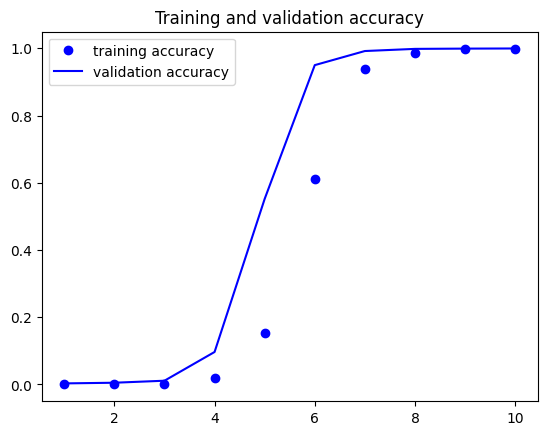

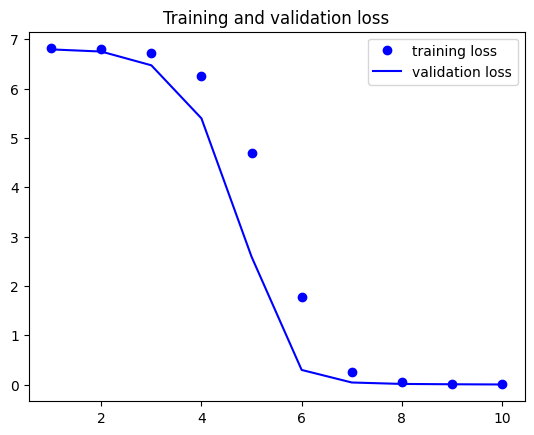

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="training accuracy")
plt.plot(epochs, val_accuracy, "b", label="validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [4]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 26B2-285B

 Directorio de c:\Users\juan-\Videos\python\pokemon\tasks\static

27/05/2024  04:34 p.�m.    <DIR>          .
27/05/2024  04:34 p.�m.    <DIR>          ..
27/05/2024  04:32 p.�m.    <DIR>          images
27/05/2024  04:33 p.�m.    <DIR>          images2
25/05/2024  09:52 p.�m.       233.976.471 model_pokemon.keras
27/05/2024  04:33 p.�m.    <DIR>          numpy
27/05/2024  04:32 p.�m.    <DIR>          prueba
27/05/2024  05:15 p.�m.           215.546 Untitled0.ipynb
               2 archivos    234.192.017 bytes
               6 dirs  779.852.402.688 bytes libres


In [3]:
import os

# Obtener los nombres de las clases (nombres de los Pokémon)
pokemon_names = sorted(os.listdir('images'))

print("Nombres de los Pokémon:", pokemon_names)

Nombres de los Pokémon: ['Abomasnow', 'Abra', 'Absol', 'Accelgor', 'Aegislash', 'Aerodactyl', 'Aggron', 'Aipom', 'Alakazam', 'Alcremie', 'Alomomola', 'Altaria', 'Amaura', 'Ambipom', 'Amoonguss', 'Ampharos', 'Anorith', 'Appletun', 'Applin', 'Araquanid', 'Arbok', 'Arcanine', 'Arceus', 'Archen', 'Archeops', 'Arctovish', 'Arctozolt', 'Ariados', 'Armaldo', 'Aromatisse', 'Aron', 'Arrokuda', 'Articuno', 'Audino', 'Aurorus', 'Avalugg', 'Axew', 'Azelf', 'Azumarill', 'Azurill', 'Bagon', 'Baltoy', 'Banette', 'Barbaracle', 'Barboach', 'Barraskewda', 'Basculin', 'Bastiodon', 'Bayleef', 'Beartic', 'Beautifly', 'Beedrill', 'Beheeyem', 'Beldum', 'Bellossom', 'Bellsprout', 'Bergmite', 'Bewear', 'Bibarel', 'Bidoof', 'Binacle', 'Bisharp', 'Blacephalon', 'Blastoise', 'Blaziken', 'Blipbug', 'Blissey', 'Blitzle', 'Boldore', 'Boltund', 'Bonsly', 'Bouffalant', 'Bounsweet', 'Braixen', 'Braviary', 'Breloom', 'Brionne', 'Bronzong', 'Bronzor', 'Bruxish', 'Budew', 'Buizel', 'Bulbasaur', 'Buneary', 'Bunnelby', 'Bur

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Carga del modelo desde el archivo pokemon.keras
model_path = '../ruta/del/pokemon.keras'
model = load_model(model_path)

# Carga de la imagen que deseas clasificar
img_path = 'prueba/1.jpg'
img = image.load_img(img_path, target_size=(150, 150))

# Preprocesamiento de la imagen para que coincida con el formato de entrada del modelo
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalización

# Realizar la predicción
prediction = model.predict(img_array)

# Obtener la etiqueta de clase predicha
predicted_class = np.argmax(prediction)

# Mapear la etiqueta de clase a un nombre de Pokémon
predicted_pokemon = pokemon_names[predicted_class]

print("El Pokémon en la imagen es:", predicted_pokemon)
print("Porcentaje de coincidencia: {:.2f}%".format(prediction[0][predicted_class] * 100))


1/1 [==============================] - 0s 17ms/step
El Pokémon en la imagen es: Charmander
Porcentaje de coincidencia: 99.93%


Los 5 valores más grandes: [9.9926561e-01 6.2927371e-04 4.3641736e-05 3.1223622e-05 1.5156840e-05]


In [ ]:
indices_top5 = np.argsort(-prediction[0])[:5]

print("Índices de los 5 valores más grandes:", indices_top5[:5])

Índices de los 5 valores más grandes: [107 108 616 136 653]


In [ ]:
top5_values = prediction[0][indices_top5]
print("Los 5 valores más grandes:", top5_values)

Los 5 valores más grandes: [9.9926561e-01 6.2927371e-04 4.3641736e-05 3.1223622e-05 1.5156840e-05]


In [ ]:
indices_top5

array([107, 108, 616, 136, 653])

In [ ]:
for i in indices_top5:
  predicted_pokemon = pokemon_names[i]
  print(predicted_pokemon)
  print("Porcentaje de coincidencia: {:.2f}%".format(prediction[0][i] * 100))

Charmander
Porcentaje de coincidencia: 99.93%
Charmeleon
Porcentaje de coincidencia: 0.06%
Rapidash
Porcentaje de coincidencia: 0.00%
Comfey
Porcentaje de coincidencia: 0.00%
Sandshrew
Porcentaje de coincidencia: 0.00%


In [ ]:
prediction[0][107]

0.9992656

In [ ]:
prediction

array([[1.28418872e-23, 6.74435924e-11, 1.50941139e-19, 2.42597220e-22,
        1.21582787e-14, 1.48153089e-22, 7.51343867e-18, 4.84042975e-18,
        2.47238115e-11, 2.89875800e-07, 1.46338623e-17, 6.68253174e-20,
        2.79966973e-21, 9.31474390e-17, 1.00186951e-21, 2.30308245e-07,
        3.32944076e-26, 4.67420044e-16, 1.16778939e-12, 1.43036774e-21,
        3.08640241e-19, 4.84932571e-06, 9.38824631e-21, 3.71309823e-11,
        1.53711083e-19, 5.88195714e-24, 7.59892313e-20, 7.89376431e-13,
        2.56742832e-27, 2.14006911e-17, 2.63966706e-27, 7.65262593e-12,
        1.50020410e-19, 1.24811467e-10, 1.12430340e-20, 1.93506908e-29,
        4.00313528e-17, 1.58906333e-21, 1.52464809e-27, 3.45684488e-26,
        6.63697482e-22, 1.84300728e-22, 2.11000087e-19, 8.28556990e-14,
        1.22407512e-20, 2.66013530e-13, 1.53960465e-19, 1.46348375e-21,
        6.91958990e-11, 6.10606361e-22, 1.71744712e-13, 4.73262760e-20,
        5.05070568e-14, 2.03296761e-16, 3.16196314e-08, 8.046945

In [ ]:
predicted_class

107

In [ ]:
# Carga de la imagen que deseas clasificar
img_path = 'prueba/5.png'
img = image.load_img(img_path, target_size=(150, 150))

# Preprocesamiento de la imagen para que coincida con el formato de entrada del modelo
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalización

# Realiza la predicción en la imagen
prediction = model.predict(img_array)

# Calcula el porcentaje de coincidencia
def calculate_accuracy(prediction):
    # Obtiene la etiqueta predicha
    predicted_label = np.argmax(prediction)
    # El índice del máximo valor en la predicción corresponde a la clase predicha
    return prediction[0][predicted_label] * 100

# Obtiene el porcentaje de coincidencia para la predicción
accuracy = calculate_accuracy(prediction)

print("Porcentaje de coincidencia: {:.2f}%".format(accuracy))


1/1 [==============================] - 0s 112ms/step
Porcentaje de coincidencia: 99.21%
